In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
def mean_min_max(df,variable):
    mean = df.groupby(['forecast_year', 'forecast_month'])[variable].mean().reset_index()
    min = df.groupby(['forecast_year', 'forecast_month'])[variable].min().reset_index()
    max = df.groupby(['forecast_year', 'forecast_month'])[variable].max().reset_index()

    return mean, min, max

In [42]:
dir = 'C:/Users/fitzpatrick/Desktop/Data/'
rnbs_file = dir + 'RNBS_forecasts.csv'  # Change this to your first CSV file path
df_rnbs = pd.read_csv(rnbs_file)

In [5]:
cnbs_file = dir + 'CNBS_forecasts.csv'  # Change this to your first CSV file path
df_cnbs = pd.read_csv(cnbs_file)

In [6]:
mean_su_rnbs, min_su_rnbs, max_su_rnbs = mean_min_max(df_rnbs,'sup')
mean_er_rnbs, min_er_rnbs, max_er_rnbs = mean_min_max(df_rnbs,'eri')
mean_on_rnbs, min_on_rnbs, max_on_rnbs = mean_min_max(df_rnbs,'ont')
mean_mh_rnbs, min_mh_rnbs, max_mh_rnbs = mean_min_max(df_rnbs,'mih')

mean_su_cnbs, min_su_cnbs, max_su_cnbs = mean_min_max(df_cnbs,'su_cnbs')
mean_er_cnbs, min_er_cnbs, max_er_cnbs = mean_min_max(df_cnbs,'er_cnbs')
mean_on_cnbs, min_on_cnbs, max_on_cnbs = mean_min_max(df_cnbs,'on_cnbs')
mean_mh_cnbs, min_mh_cnbs, max_mh_cnbs = mean_min_max(df_cnbs,'mh_cnbs')

In [9]:
print(mean_su_rnbs, mean_su_cnbs)

   forecast_year  forecast_month          sup
0           2024               9   996.274939
1           2024              10   605.815215
2           2024              11  -135.712416
3           2024              12  -580.453362
4           2025               1  -496.293228
5           2025               2  -497.070030
6           2025               3   -97.893618
7           2025               4  1166.239985
8           2025               5  1805.489057
9           2025               6  2311.311907    forecast_year  forecast_month      su_cnbs
0           2024               9  1421.282801
1           2024              10   237.252104
2           2024              11 -1221.413477
3           2024              12 -1685.056137
4           2025               1 -1228.588397
5           2025               2 -1093.797836
6           2025               3  -732.556880
7           2025               4  1044.011006
8           2025               5  2347.683190
9           2025               6  

In [43]:
def plot_cnbs_forecast(x_values, data_dict):
    """
    Plots RNBS forecasts for different lakes.

    Parameters:
    - x_values: array-like, the x-axis values (e.g., months)
    - data_dict: dictionary containing data for each lake. The keys are lake names, and the values are tuples containing
                 (mean, min, max) for that lake.

    The dictionary should be formatted as:
    {
        'Lake Superior': (mean_su, min_su, max_su),
        'Lake Erie': (mean_er, min_er, max_er),
        'Lake Ontario': (mean_on, min_on, max_on),
        'Lake Mich-Huron': (mean_mh, min_mh, max_mh)
    }
    """
    # Create a 4x1 grid of subplots
    fig, axs = plt.subplots(4, 3, figsize=(20, 10), sharex=True)#, sharey=True)
    axs = axs.flatten()
    
    row_labels = ['Lake Superior', 'Lake Erie', 'Lake Ontario', 'Lake Mich-Huron']
    column_labels = ['RNBS [cms]', 'CNBS [cms]', 'RNBS-CNBS [cms]']

    # Plot each dataset
    for i, (category, (mean, min_val, max_val)) in enumerate(data_dict.items()):
        axs[i].plot(x_values, mean, color='red', marker='o', markersize = 1.5, linestyle='-', linewidth=1, label='Mean')
        axs[i].axhline(y=0, color='black', linestyle='-', linewidth=1.2)
        axs[i].fill_between(x_values, min_val, max_val, color='gray', alpha=0.2)
        axs[i].set_xlim(0, 9)  # Setting x-axis limits from 1 to 10
        axs[i].grid(True, linestyle='--', alpha=0.6)
        
        if i in [2, 5, 8, 11]:  # Apply y-limits
            axs[i].set_ylim(-2000, 6000)
        else:
            axs[i].set_ylim(-2000, 10000)

        if i >= 9:  # Set labels for the last subplot
            axs[i].set_xticklabels([calendar.month_abbr[months['forecast_month'][0]], calendar.month_abbr[months['forecast_month'][1]],
                                    calendar.month_abbr[months['forecast_month'][2]], calendar.month_abbr[months['forecast_month'][3]],
                                    calendar.month_abbr[months['forecast_month'][4]], calendar.month_abbr[months['forecast_month'][5]],
                                    calendar.month_abbr[months['forecast_month'][6]], calendar.month_abbr[months['forecast_month'][7]],
                                    calendar.month_abbr[months['forecast_month'][8]], calendar.month_abbr[months['forecast_month'][9]]])

    # Add row labels on the left side        
    for i in range(4):
            axs[i * 3].set_ylabel(row_labels[i], rotation=90, labelpad=10, fontsize=12)
    
    # Add column labels on the top
    for i in range(3):
        axs[i].set_title(column_labels[i], pad=10, fontsize=12)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(dir+'rnbs_vs_cnbs.png', bbox_inches='tight')
    plt.show()

C:\Users\fitzpatrick\AppData\Local\Temp\1\ipykernel_15308\1380332245.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([calendar.month_abbr[months['forecast_month'][0]], calendar.month_abbr[months['forecast_month'][1]],
C:\Users\fitzpatrick\AppData\Local\Temp\1\ipykernel_15308\1380332245.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([calendar.month_abbr[months['forecast_month'][0]], calendar.month_abbr[months['forecast_month'][1]],
C:\Users\fitzpatrick\AppData\Local\Temp\1\ipykernel_15308\1380332245.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([calendar.month_abbr[months['forecast_month'][0]], calendar.month_abbr[months['forecast_month'][1]],


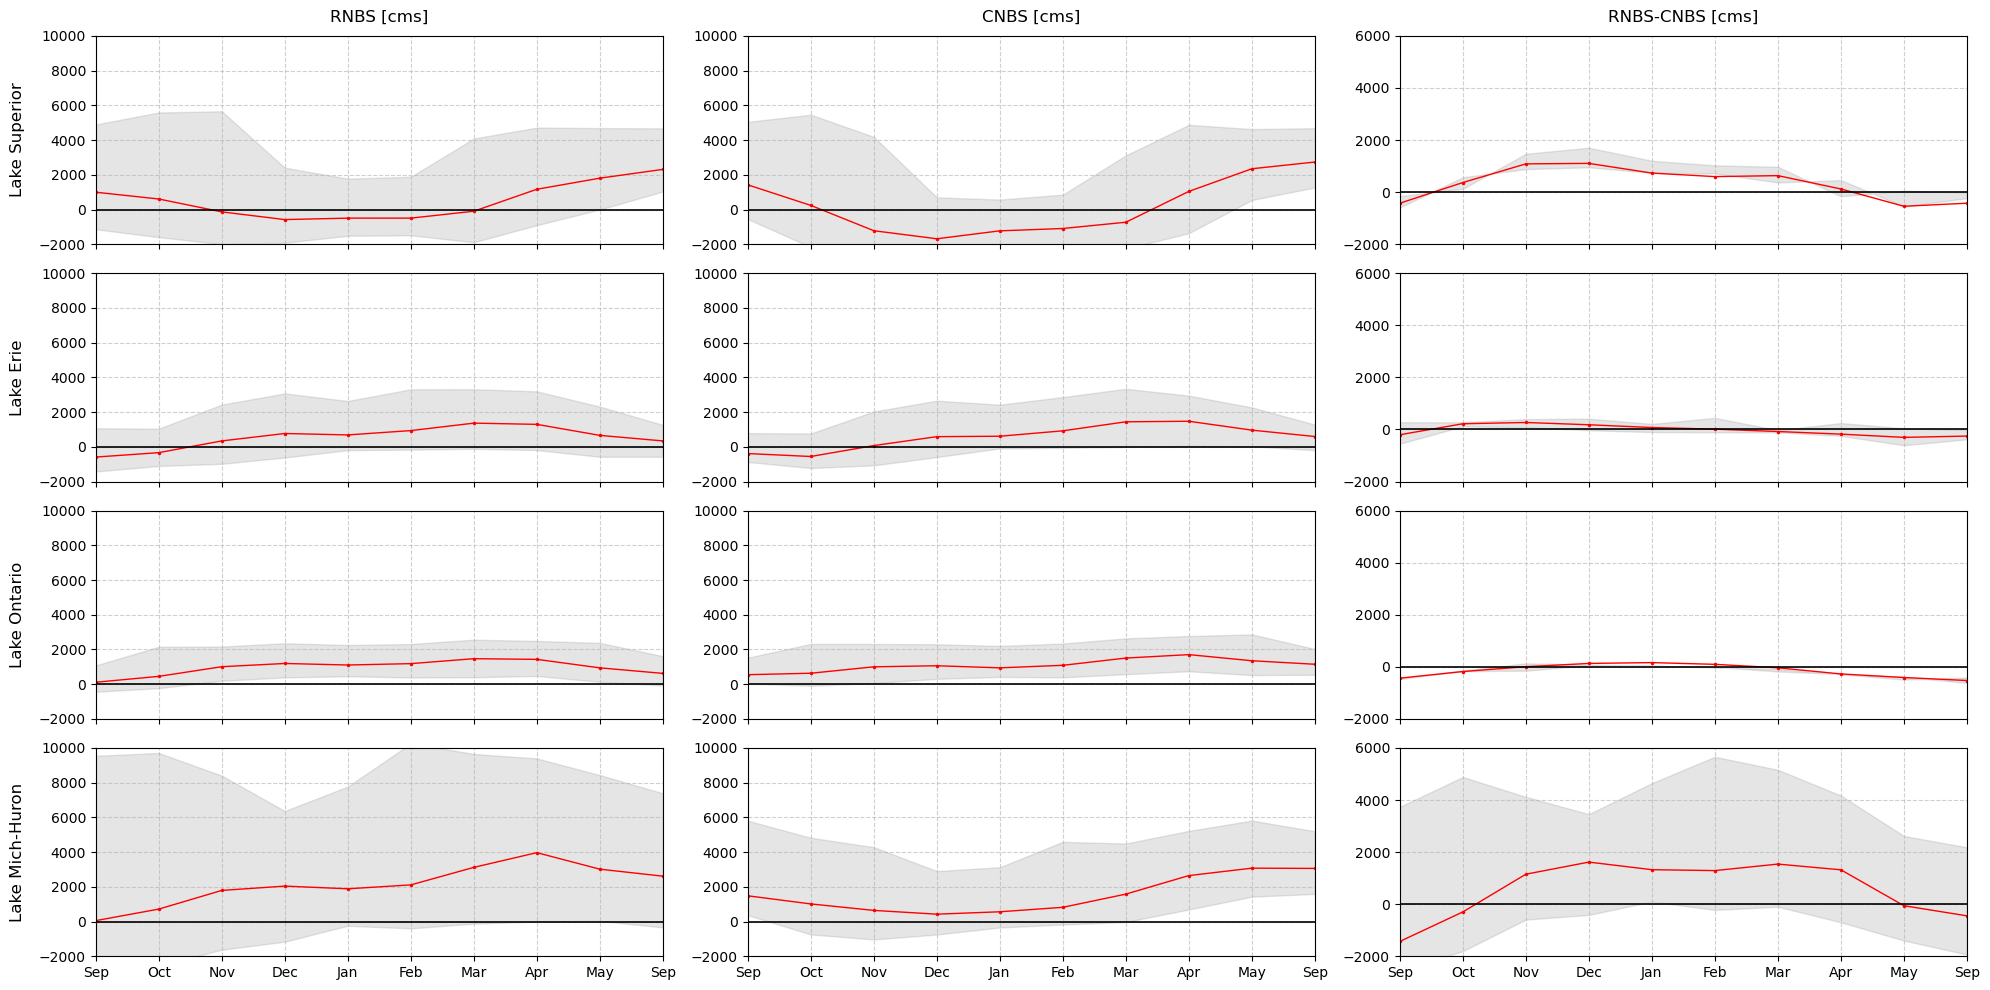

In [44]:
x_values = np.arange(len(mean_su_rnbs['sup']))  # x-axis values
data_dict = {
    'Superior RNBS': (mean_su_rnbs['sup'], min_su_rnbs['sup'], max_su_rnbs['sup']),
    'Superior CNBS': (mean_su_cnbs['su_cnbs'], min_su_cnbs['su_cnbs'], max_su_cnbs['su_cnbs']),
    'Superior R-C': (mean_su_rnbs['sup']-mean_su_cnbs['su_cnbs'], min_su_rnbs['sup']-min_su_cnbs['su_cnbs'], max_su_rnbs['sup']-max_su_cnbs['su_cnbs']),
    'Erie RNBS': (mean_er_rnbs['eri'], min_er_rnbs['eri'], max_er_rnbs['eri']),
    'Erie CNBS': (mean_er_cnbs['er_cnbs'], min_er_cnbs['er_cnbs'], max_er_cnbs['er_cnbs']),
    'Erie R-C': (mean_er_rnbs['eri']-mean_er_cnbs['er_cnbs'], min_er_rnbs['eri']-min_er_cnbs['er_cnbs'], max_er_rnbs['eri']-max_er_cnbs['er_cnbs']),
    'Ontario RNBS': (mean_on_rnbs['ont'], min_on_rnbs['ont'], max_on_rnbs['ont']),
    'Ontario CNBS': (mean_on_cnbs['on_cnbs'], min_on_cnbs['on_cnbs'], max_on_cnbs['on_cnbs']),
    'Ontario R-C': (mean_on_rnbs['ont']-mean_on_cnbs['on_cnbs'], min_on_rnbs['ont']-min_on_cnbs['on_cnbs'], max_on_rnbs['ont']-max_on_cnbs['on_cnbs']),
    'Mich-Huron RNBS': (mean_mh_rnbs['mih'], min_mh_rnbs['mih'], max_mh_rnbs['mih']),
    'Mich-Huron CNBS': (mean_mh_cnbs['mh_cnbs'], min_mh_cnbs['mh_cnbs'], max_mh_cnbs['mh_cnbs']),
    'Mich-Huron R-C': (mean_mh_rnbs['mih']-mean_mh_cnbs['mh_cnbs'], min_mh_rnbs['mih']-min_mh_cnbs['mh_cnbs'], max_mh_rnbs['mih']-max_mh_cnbs['mh_cnbs'])
}

months = pd.DataFrame(df_rnbs['forecast_month']).reset_index(drop=True)

plot_cnbs_forecast(x_values, data_dict)